In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/archive (2).zip')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
data.describe()


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [8]:
data.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [9]:
data['Salary']=data['Salary'].astype('int')

In [10]:
data['YearsExperience']=data['YearsExperience'].astype('int')

In [11]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1,39344
1,1,1,46206
2,2,1,37732
3,3,2,43526
4,4,2,39892
5,5,3,56643
6,6,3,60151
7,7,3,54446
8,8,3,64446
9,9,3,57190


In [12]:
X= data.drop('Salary',axis=1)
y=data['Salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
y_pred=model.predict(X_test_scaled)
y_pred

array([112604.06215501,  74036.78426161, 103134.08342005,  73693.10278482,
        54924.9860533 ,  54753.1453149 ])

In [26]:
y_test

27    112636
15     67939
23    113813
17     83089
8      64446
9      57190
Name: Salary, dtype: int64

In [28]:
model.score(X_test_scaled,y_test)

0.8903364744511593

In [36]:
y_pred_train = model.predict(X_train_scaled)

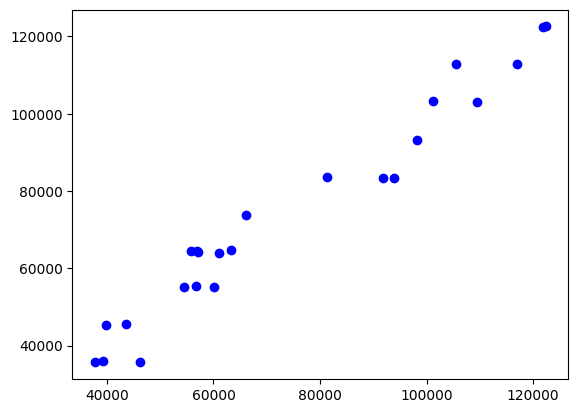

In [39]:
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs Predicted')

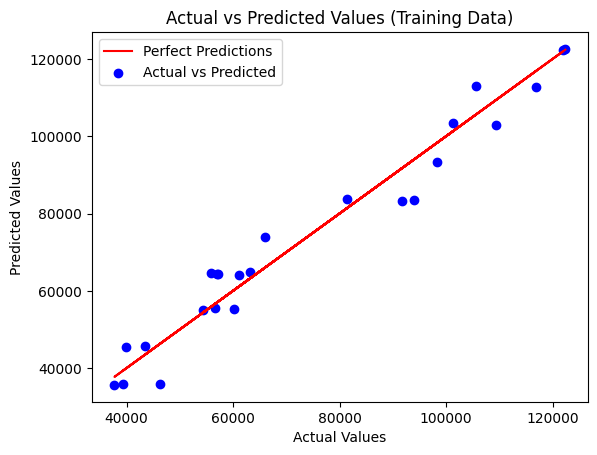

In [43]:
plt.plot(y_train, y_train, color='red', label='Perfect Predictions')
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs Predicted')
plt.title('Actual vs Predicted Values (Training Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()